In [289]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install openpyxl

In [290]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [291]:
rent = pd.read_csv(r"C:\Users\aleks\Desktop\Lessons\Week_5\Mid_bootcamp_project\data\clean\cleaned_dataset.csv")
rent.head() #read the new cleaned data

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False


In [292]:
# Noticed that in the dataset there are some rown in which living space is bigger than total rent which does not makes sense. So I will delete them.

mask = rent['livingspace'] > rent['totalrent']
result = rent[mask]
print(result)

                      regio  servicecharge                     heatingtype   
1119                Sachsen          105.0                 central_heating  \
1883    Nordrhein_Westfalen           75.0            night_storage_heater   
4208                Sachsen          100.0                 central_heating   
5034                Sachsen          100.0                 central_heating   
5738                Sachsen           75.0  self_contained_central_heating   
...                     ...            ...                             ...   
263162              Sachsen          120.0                 central_heating   
266152  Nordrhein_Westfalen           80.0  self_contained_central_heating   
267810  Nordrhein_Westfalen          100.0  self_contained_central_heating   
268010    Baden_Württemberg          350.0                district_heating   
268128              Sachsen          112.0                 central_heating   

        newlyconst  balcony  totalrent  yearconstructed      fi

In [293]:
# Deleting these rows

rentnew = rent.drop(rent[rent['livingspace'] > rent['totalrent']].index)
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [294]:
# Spliting numerical and categorical columns

num_cols = rentnew.select_dtypes(include=['float64', 'int64']).columns.tolist()
cat_cols = rentnew.select_dtypes(include=['object']).columns.tolist()

# Create new dataframes for numerical and categorical data
cat_rent = rentnew[cat_cols]
cat_rent

,regio,heatingtype,firingtypes,condition,interiorqual,typeofflat
0,Nordrhein_Westfalen,central_heating,oil,well_kept,normal,ground_floor
1,Rheinland_Pfalz,self_contained_central_heating,gas,refurbished,normal,ground_floor
2,Sachsen,floor_heating,central_heating,first_time_use,sophisticated,apartment
3,Sachsen,district_heating,district_heating,central_heating,central_heating,other
4,Bremen,self_contained_central_heating,gas,refurbished,central_heating,apartment
...,...,...,...,...,...,...
268788,Bayern,heat_pump,geothermal,mint_condition,sophisticated,roof_storey
268789,Hessen,gas_heating,gas,well_kept,sophisticated,apartment
268790,Hessen,central_heating,gas,well_kept,central_heating,apartment
268791,Nordrhein_Westfalen,heat_pump,gas,first_time_use,sophisticated,apartment


In [295]:
num_rent = rentnew[num_cols]
num_rent

,servicecharge,totalrent,yearconstructed,baserent,livingspace,norooms,floor,numberoffloors
0,245.00,840.0000,1965.0,595.0,86.00,4.0,1.000000,3.000000
1,134.00,814.9426,1871.0,800.0,89.00,3.0,2.101113,3.518874
2,255.00,1300.0000,2019.0,965.0,83.80,3.0,3.000000,4.000000
3,58.15,814.9426,1964.0,343.0,58.15,3.0,3.000000,3.518874
4,138.00,903.0000,1950.0,765.0,84.97,3.0,1.000000,3.518874
...,...,...,...,...,...,...,...,...
268788,90.00,910.0000,2016.0,820.0,90.00,3.0,2.101113,3.518874
268789,220.00,1150.0000,1983.0,930.0,115.00,3.5,1.000000,1.000000
268790,220.00,930.0000,1965.0,650.0,95.00,4.0,1.000000,2.000000
268791,175.00,1015.0000,2019.0,840.0,70.00,2.0,2.101113,5.000000


In [296]:
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [297]:
# Considering the values where livingspace is less than 150.

rentnew = rent[rent['livingspace'] <= 150]
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,baserent,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,595.0,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,800.0,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,965.0,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,343.0,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,765.0,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,820.0,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,930.0,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,650.0,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,840.0,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False


In [298]:
# Analyzing the column regio
print(rentnew['regio'].value_counts())


regio
Nordrhein_Westfalen       61550
Sachsen                   57272
Bayern                    20775
Sachsen_Anhalt            19982
Hessen                    16941
Niedersachsen             16175
Baden_Württemberg         15324
Berlin                     9749
Thüringen                  8310
Rheinland_Pfalz            8065
Brandenburg                6840
Mecklenburg_Vorpommern     6573
Schleswig_Holstein         6563
Hamburg                    3557
Bremen                     2910
Saarland                   1386
Name: count, dtype: int64


In [299]:
# Show a plot of regio.
rentnew['regio'].unique()

array(['Nordrhein_Westfalen', 'Rheinland_Pfalz', 'Sachsen', 'Bremen',
       'Schleswig_Holstein', 'Baden_Württemberg', 'Thüringen', 'Hessen',
       'Niedersachsen', 'Bayern', 'Hamburg', 'Sachsen_Anhalt',
       'Mecklenburg_Vorpommern', 'Berlin', 'Brandenburg', 'Saarland'],
      dtype=object)

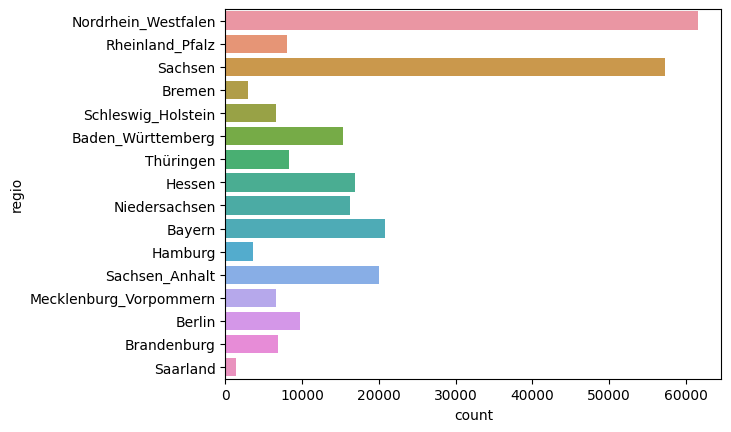

In [300]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

rentnew['regio'].value_counts()
sns.countplot(data=rentnew, y="regio")
plt.show()

In [301]:
# Find the average totalrent for each regio.

avg_rent_by_regio = rentnew.groupby('regio')['totalrent'].mean()
print(avg_rent_by_region)

regio
Baden_Württemberg         1062.271797
Bayern                    1134.280717
Berlin                    1337.112086
Brandenburg                682.090385
Bremen                     777.535011
Hamburg                   1336.504978
Hessen                    1094.234149
Mecklenburg_Vorpommern     590.714961
Niedersachsen              780.113368
Nordrhein_Westfalen        786.753493
Rheinland_Pfalz            838.674670
Saarland                   747.561660
Sachsen                    598.915893
Sachsen_Anhalt             548.097871
Schleswig_Holstein         824.827507
Thüringen                  558.095635
Name: totalrent, dtype: float64


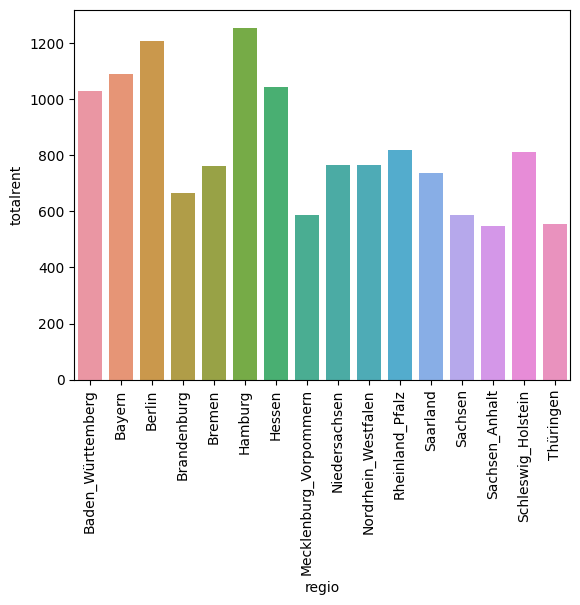

In [302]:
# Presenting the results in a bar chart. 
avg_rent = rentnew.groupby('regio')['totalrent'].mean().reset_index()

sns.barplot(data=avg_rent, x='regio', y='totalrent')
plt.xticks(rotation=90)
plt.show()

In [303]:
# Creating a new column which calculates the price per square meter in order to have a better understanding of prices in different regios.

rentnew['pricesqmt'] = rentnew['totalrent'] / rentnew['livingspace']
rentnew

C:\Users\aleks\AppData\Local\Temp\ipykernel_36712\73604337.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rentnew['pricesqmt'] = rentnew['totalrent'] / rentnew['livingspace']


,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.156658
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.014490
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [304]:
rentnew['pricesqmt'].isnull().sum()

5

In [305]:
rentnew = rentnew.dropna(subset=['pricesqmt'])
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.156658
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.014490
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [306]:
# There are some rows which containt infinite values so I will drop them in order to avoid confusion of the plots.

rentnew = rentnew[~np.isinf(rentnew['pricesqmt'])]
rentnew

,regio,servicecharge,heatingtype,newlyconst,balcony,totalrent,yearconstructed,firingtypes,haskitchen,cellar,...,livingspace,condition,interiorqual,lift,typeofflat,norooms,floor,numberoffloors,garden,pricesqmt
0,Nordrhein_Westfalen,245.00,central_heating,False,False,840.0000,1965.0,oil,False,True,...,86.00,well_kept,normal,False,ground_floor,4.0,1.000000,3.000000,True,9.767442
1,Rheinland_Pfalz,134.00,self_contained_central_heating,False,True,814.9426,1871.0,gas,False,False,...,89.00,refurbished,normal,False,ground_floor,3.0,2.101113,3.518874,False,9.156658
2,Sachsen,255.00,floor_heating,True,True,1300.0000,2019.0,central_heating,False,True,...,83.80,first_time_use,sophisticated,True,apartment,3.0,3.000000,4.000000,False,15.513126
3,Sachsen,58.15,district_heating,False,True,814.9426,1964.0,district_heating,False,False,...,58.15,central_heating,central_heating,False,other,3.0,3.000000,3.518874,False,14.014490
4,Bremen,138.00,self_contained_central_heating,False,True,903.0000,1950.0,gas,False,False,...,84.97,refurbished,central_heating,False,apartment,3.0,1.000000,3.518874,False,10.627280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268788,Bayern,90.00,heat_pump,False,True,910.0000,2016.0,geothermal,False,True,...,90.00,mint_condition,sophisticated,False,roof_storey,3.0,2.101113,3.518874,False,10.111111
268789,Hessen,220.00,gas_heating,False,True,1150.0000,1983.0,gas,True,False,...,115.00,well_kept,sophisticated,False,apartment,3.5,1.000000,1.000000,False,10.000000
268790,Hessen,220.00,central_heating,False,True,930.0000,1965.0,gas,False,True,...,95.00,well_kept,central_heating,False,apartment,4.0,1.000000,2.000000,True,9.789474
268791,Nordrhein_Westfalen,175.00,heat_pump,True,True,1015.0000,2019.0,gas,False,True,...,70.00,first_time_use,sophisticated,True,apartment,2.0,2.101113,5.000000,False,14.500000


In [307]:
# Comparing the price per square meter in different regions. 

rentnew.loc[rentnew['regio'] == 'Baden_Württemberg', 'pricesqmt'].mean()

14.375162500675243

In [308]:
rentnew.loc[rentnew['regio'] == 'Bayern', 'pricesqmt'].mean()

15.735508039238555

In [309]:
rentnew.loc[rentnew['regio'] == 'Berlin', 'pricesqmt'].mean()

17.141712134339365

In [310]:
rentnew.loc[rentnew['regio'] == 'Brandenburg', 'pricesqmt'].mean()

10.172108326494207

In [311]:
rentnew.loc[rentnew['regio'] == 'Bremen', 'pricesqmt'].mean()

11.089046823730493

In [312]:
rentnew.loc[rentnew['regio'] == 'Hamburg', 'pricesqmt'].mean()

16.73173636980006

In [313]:
rentnew.loc[rentnew['regio'] == 'Hessen', 'pricesqmt'].mean()

14.851359772674966

In [314]:
rentnew.loc[rentnew['regio'] == 'Mecklenburg_Vorpommern', 'pricesqmt'].mean()

9.598586781478371

In [315]:
rentnew.loc[rentnew['regio'] == 'Niedersachsen', 'pricesqmt'].mean()

11.08599526636448

In [316]:
rentnew.loc[rentnew['regio'] == 'Nordrhein_Westfalen', 'pricesqmt'].mean()

11.036255111655093

In [317]:
rentnew.loc[rentnew['regio'] == 'Rheinland_Pfalz', 'pricesqmt'].mean()

11.650680237891955

In [318]:
rentnew.loc[rentnew['regio'] == 'Saarland', 'pricesqmt'].mean()

10.285194954055498

In [319]:
rentnew.loc[rentnew['regio'] == 'Sachsen', 'pricesqmt'].mean()

9.155052349114284

In [320]:
rentnew.loc[rentnew['regio'] == 'Sachsen_Anhalt', 'pricesqmt'].mean()

9.081424207893527

In [321]:
rentnew.loc[rentnew['regio'] == 'Schleswig_Holstein', 'pricesqmt'].mean()

11.520807348752074

In [322]:
rentnew.loc[rentnew['regio'] == 'Thüringen', 'pricesqmt'].mean()

9.042199864635935

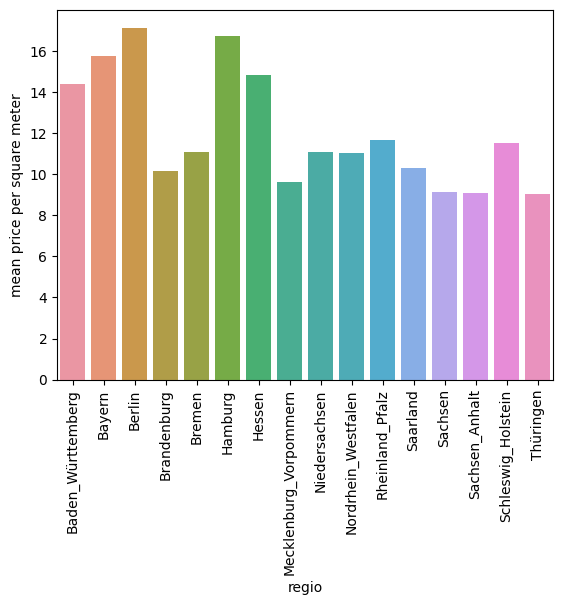

In [323]:
# Creating a plot to visualise the results. 

mean_pricesqmt = rentnew.groupby('regio')['pricesqmt'].mean()

# create bar plot using seaborn
sns.barplot(x=mean_pricesqmt.index, y=mean_pricesqmt.values)
plt.xticks(rotation=90)
plt.xlabel('regio')
plt.ylabel('mean price per square meter')
plt.show()

In [324]:
# identify continuous variables
continuous_vars = [col for col in rentnew.columns if rentnew[col].dtype in ['int64', 'float64']]
print('Continuous variables:', continuous_vars)

# identify discrete variables
discrete_vars = [col for col in rentnew.columns if col not in continuous_vars]
print('Discrete variables:', discrete_vars)

Continuous variables: ['servicecharge', 'totalrent', 'yearconstructed', 'baserent', 'livingspace', 'norooms', 'floor', 'numberoffloors', 'pricesqmt']
Discrete variables: ['regio', 'heatingtype', 'newlyconst', 'balcony', 'firingtypes', 'haskitchen', 'cellar', 'condition', 'interiorqual', 'lift', 'typeofflat', 'garden']
